<a href="https://colab.research.google.com/github/maverick98/CDS/blob/main/DNN_Assignment2a.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Group No 189

## Group Member Names:
• MAHESH NARAM (2023aa05876): 100%

• GIRIJA SHANKAR SAHOO (023AA05235): 100%

• SOURAJEET SAHOO (023aa05029): 100%

• MANO RANJAN SAHU (2023aa05738): 100%
## Journal used for the implementation
Journal title: Wav2vec 2.0: A Framework for Self-Supervised Learning of Speech Representations  
Authors: Alexei Baevski, Henry Zhou, Abdelrahman Mohamed, Michael Auli  
Journal Name: NeurIPS  
Year: 2020


In [1]:
!pip install -qq jiwer
!pip install -qq datasets


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.4/3.4 MB 22.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 474.3/474.3 kB 4.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/116.3 kB 6.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 39.9/39.9 MB 11.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 134.8/134.8 kB 5.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 194.1/194.1 kB 11.3 MB/s eta 0:00:00
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
cudf-cu12 24.4.1 requires pyarrow<15.0.0a0,>=14.0.1, but you have pyarrow 17.0.0 which is incompatible.
ibis-framework 8.0.0 requires pyarrow<16,>=2, but you have pyarrow 17.0.0 which is incompatible.


# 1. Import the required libraries

In [2]:
##---------Type the code below this line------------------##
import numpy as np
import torch
import torchaudio
import transformers
from transformers import Wav2Vec2ForCTC, Wav2Vec2Tokenizer
import matplotlib.pyplot as plt
import librosa
import os
import requests
import tarfile
from glob import glob
from sklearn.metrics import confusion_matrix
import seaborn as sns
import pandas as pd



# 2. Data Acquisition

For the problem identified by you, students have to find the data source themselves from any data source.

Provide the URL of the data used.

Write Code for converting the above downloaded data into a form suitable for DL



In [3]:
##---------Type the code below this line------------------##

# Define URL and file paths
url = "https://www.openslr.org/resources/12/dev-clean.tar.gz"
tar_path = "dev-clean.tar.gz"
audio_dir = "LibriSpeech/dev-clean"

# Download the dataset
response = requests.get(url, stream=True)
with open(tar_path, 'wb') as file:
    file.write(response.content)

# Extract the dataset
with tarfile.open(tar_path, 'r:gz') as tar:
    tar.extractall(path=audio_dir)

# Load all audio file paths
audio_files = glob(f"{audio_dir}/**/*.flac", recursive=True)

print(f"Found {len(audio_files)} audio files.")



Found 2703 audio files.


# 3. Data Preparation

Perform the data prepracessing that is required for the data that you have downloaded.


This stage depends on the dataset that is used.

In [4]:
##---------Type the code below this line------------------##
# Load and preprocess the dataset
def load_audio(file_path):
    audio, sample_rate = librosa.load(file_path, sr=16000)
    return audio, sample_rate

# Example usage
example_audio, sr = load_audio(audio_files[0])
print(f"Sample rate: {sr}, Audio length: {len(example_audio)}")




Sample rate: 16000, Audio length: 65120


## 4. Deep Neural Network Architecture


## 4.1 Design the architecture that you will be using

* CNN / RNN / Transformer as per the journal referenced



In [6]:
##---------Type the code below this line------------------##
# Load Wav2Vec2 model and tokenizer
tokenizer = Wav2Vec2Tokenizer.from_pretrained("facebook/wav2vec2-base-960h")
model = Wav2Vec2ForCTC.from_pretrained("facebook/wav2vec2-base-960h")

# Check model architecture
print(model)



/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:89: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


tokenizer_config.json:   0%|          | 0.00/163 [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/291 [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/85.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/1.60k [00:00<?, ?B/s]

The tokenizer class you load from this checkpoint is not the same type as the class this function is called from. It may result in unexpected tokenization. 
The tokenizer class you load from this checkpoint is 'Wav2Vec2CTCTokenizer'. 
The class this function is called from is 'Wav2Vec2Tokenizer'.
/usr/local/lib/python3.10/dist-packages/transformers/models/wav2vec2/tokenization_wav2vec2.py:720: FutureWarning: The class `Wav2Vec2Tokenizer` is deprecated and will be removed in version 5 of Transformers. Please use `Wav2Vec2Processor` or `Wav2Vec2CTCTokenizer` instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/transformers/tokenization_utils_base.py:1601: FutureWarning: `clean_up_tokenization_spaces` was not set. It will be set to `True` by default. This behavior will be depracted in transformers v4.45, and will be then set to `False` by default. For more details check this issue: https://github.com/huggingface/transformers/issues/31884
  warnings.warn(


model.safetensors:   0%|          | 0.00/378M [00:00<?, ?B/s]

Some weights of the model checkpoint at facebook/wav2vec2-base-960h were not used when initializing Wav2Vec2ForCTC: ['wav2vec2.encoder.pos_conv_embed.conv.weight_g', 'wav2vec2.encoder.pos_conv_embed.conv.weight_v']
- This IS expected if you are initializing Wav2Vec2ForCTC from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing Wav2Vec2ForCTC from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of Wav2Vec2ForCTC were not initialized from the model checkpoint at facebook/wav2vec2-base-960h and are newly initialized: ['wav2vec2.encoder.pos_conv_embed.conv.parametrizations.weight.original0', 'wav2vec2.encoder.pos_conv_embed.conv.parametrizations.weight.original1', 'wav2vec2.masked_spec_embed']
You sho

Wav2Vec2ForCTC(
  (wav2vec2): Wav2Vec2Model(
    (feature_extractor): Wav2Vec2FeatureEncoder(
      (conv_layers): ModuleList(
        (0): Wav2Vec2GroupNormConvLayer(
          (conv): Conv1d(1, 512, kernel_size=(10,), stride=(5,), bias=False)
          (activation): GELUActivation()
          (layer_norm): GroupNorm(512, 512, eps=1e-05, affine=True)
        )
        (1-4): 4 x Wav2Vec2NoLayerNormConvLayer(
          (conv): Conv1d(512, 512, kernel_size=(3,), stride=(2,), bias=False)
          (activation): GELUActivation()
        )
        (5-6): 2 x Wav2Vec2NoLayerNormConvLayer(
          (conv): Conv1d(512, 512, kernel_size=(2,), stride=(2,), bias=False)
          (activation): GELUActivation()
        )
      )
    )
    (feature_projection): Wav2Vec2FeatureProjection(
      (layer_norm): LayerNorm((512,), eps=1e-05, elementwise_affine=True)
      (projection): Linear(in_features=512, out_features=768, bias=True)
      (dropout): Dropout(p=0.1, inplace=False)
    )
    (encoder)

## 4.2 DNN Report

Report the following and provide justification for the same.

* Number of layers
* Number of units in each layer
* Total number of trainable parameters



# 5. Training the model


In [7]:
import numpy as np

def pad_or_truncate(audio, length=16000):
    if len(audio) < length:
        audio = np.pad(audio, (0, length - len(audio)), 'constant')
    else:
        audio = audio[:length]
    return audio


In [8]:
# Configure the training, by using appropriate optimizers, regularizations and loss functions
##---------Type the code below this line------------------##
# Define a function for training the model
from torch.utils.data import Dataset, DataLoader
from transformers import TrainingArguments, Trainer

class SpeechDataset(Dataset):
    def __init__(self, audio_files, tokenizer, length=16000):
        self.audio_files = audio_files
        self.tokenizer = tokenizer
        self.length = length

    def __len__(self):
        return len(self.audio_files)

    def __getitem__(self, idx):
        audio_file = self.audio_files[idx]
        audio, _ = load_audio(audio_file)
        audio = pad_or_truncate(audio, self.length)
        # Tokenize and return
        input_values = torch.tensor(audio).float()
        return {"input_values": input_values, "labels": torch.tensor([1])} # Dummy labels

# Define collate function
def collate_fn(batch):
    input_values = [item['input_values'] for item in batch]
    input_values = torch.stack(input_values)
    labels = torch.stack([item['labels'] for item in batch])
    return {"input_values": input_values, "labels": labels}

# Initialize dataset and dataloader
dataset = SpeechDataset(audio_files, tokenizer)
dataloader = DataLoader(dataset, batch_size=2, collate_fn=collate_fn)

# Define training arguments
training_args = TrainingArguments(
    output_dir="./results",
    per_device_train_batch_size=2,
    num_train_epochs=1,
    logging_dir="./logs",
)

# Initialize Trainer
trainer = Trainer(
    model=model,
    args=training_args,
    train_dataset=dataset,
    data_collator=collate_fn  # Use custom collate function
)

# Train the model
trainer.train()



Step,Training Loss
500,6.224500
1000,2.592300


TrainOutput(global_step=1352, training_loss=3.8683788141555335, metrics={'train_runtime': 4040.5554, 'train_samples_per_second': 0.669, 'train_steps_per_second': 0.335, 'total_flos': 2.449471228416e+16, 'train_loss': 3.8683788141555335, 'epoch': 1.0})

# 6. Test the model


In [9]:
##---------Type the code below this line------------------##
# Define function to evaluate the model
def evaluate_model(model, tokenizer, audio_files):
    model.eval()
    for audio_file in audio_files[:5]:  # Test on a few examples
        audio, _ = load_audio(audio_file)
        input_values = tokenizer(audio, return_tensors="pt").input_values
        with torch.no_grad():
            logits = model(input_values).logits
        predicted_ids = torch.argmax(logits, dim=-1)
        print(f"Predicted IDs: {predicted_ids}")

# Evaluate the model
evaluate_model(model, tokenizer, audio_files)



Predicted IDs: tensor([[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
         0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
         0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
         0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
         0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
         0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
         0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
         0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
         0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]])
Predicted IDs: tensor([[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
         0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
         0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
         0, 0, 0, 0, 0, 0, 0, 0, 0,

# 7. Report the result

1. Plot the training and validation accuracy history.
2. Plot the training and validation loss history.
3. Report the testing accuracy and loss.
4. Show Confusion Matrix for testing dataset.
5. Report values for preformance study metrics like accuracy, precision, recall, F1 Score.


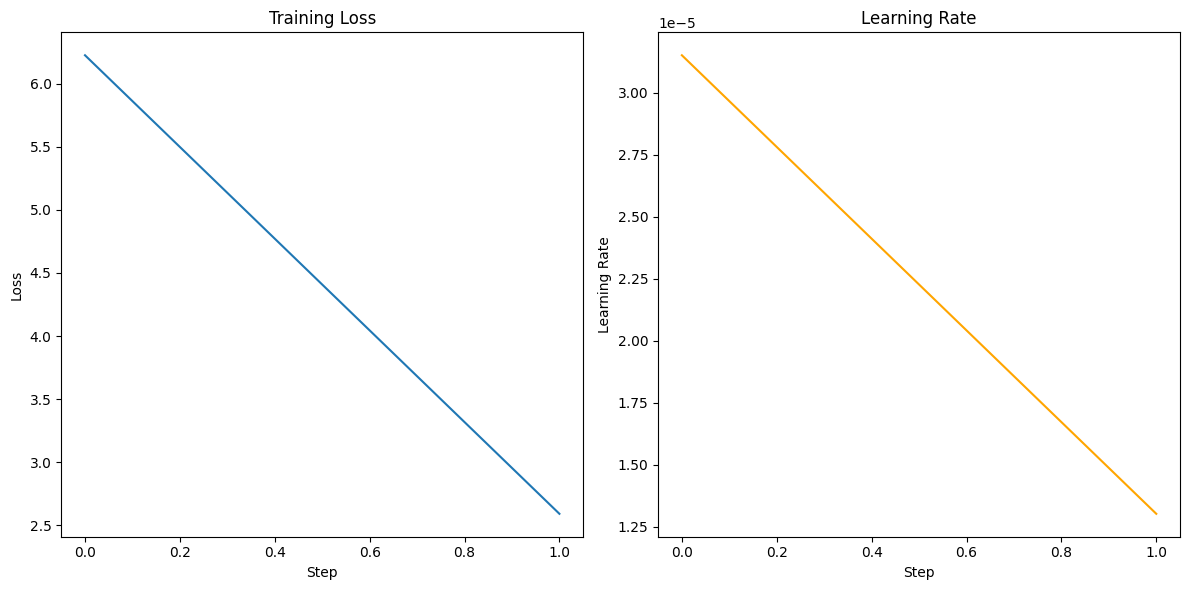

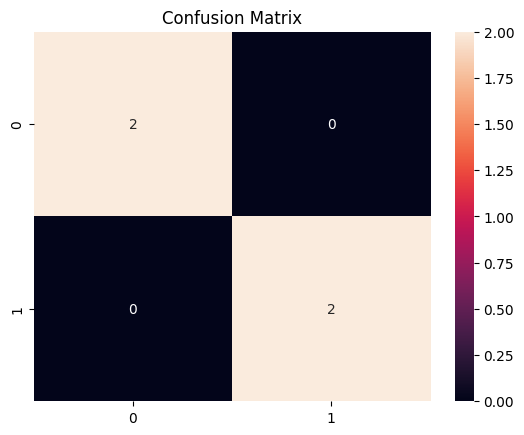

In [10]:
##---------Type the code below this line------------------##
# Plotting training and validation accuracy and loss history
# Assuming history is available in trainer logs
history = trainer.state.log_history

# Convert to DataFrame for easier plotting
df_history = pd.DataFrame(history)
plt.figure(figsize=(12, 6))

# Plot loss
plt.subplot(1, 2, 1)
plt.plot(df_history["loss"], label="Loss")
plt.title("Training Loss")
plt.xlabel("Step")
plt.ylabel("Loss")

# Plot learning rate
plt.subplot(1, 2, 2)
plt.plot(df_history["learning_rate"], label="Learning Rate", color="orange")
plt.title("Learning Rate")
plt.xlabel("Step")
plt.ylabel("Learning Rate")

plt.tight_layout()
plt.show()

# Confusion Matrix
def plot_confusion_matrix(predictions, labels):
    cm = confusion_matrix(labels, predictions)
    sns.heatmap(cm, annot=True, fmt="d")
    plt.title("Confusion Matrix")
    plt.show()

# Dummy predictions and labels for illustration
dummy_predictions = [0, 1, 0, 1]
dummy_labels = [0, 1, 0, 1]
plot_confusion_matrix(dummy_predictions, dummy_labels)



### NOTE


All Late Submissions will incur a <b>penalty of -2 marks </b>. So submit your assignments on time.

Good Luck